In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import itertools
from collections import Counter
%matplotlib inline

In [2]:
train_data = pd.read_json('data/train.json')

# High Level Description of Data

In [3]:
train_data.shape

(49352, 15)

In [4]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
print 'Columns in training data:'
for column in train_data.columns.values:
    print column, type(train_data[column].values[0])

Columns in training data:
bathrooms <type 'numpy.float64'>
bedrooms <type 'numpy.int64'>
building_id <type 'unicode'>
created <type 'unicode'>
description <type 'unicode'>
display_address <type 'unicode'>
features <type 'list'>
interest_level <type 'unicode'>
latitude <type 'numpy.float64'>
listing_id <type 'numpy.int64'>
longitude <type 'numpy.float64'>
manager_id <type 'unicode'>
photos <type 'list'>
price <type 'numpy.int64'>
street_address <type 'unicode'>


##### 7 unicode, 6 numeric, 2 list features

In [6]:
print 'Number of null values present in training data: {}'.format(train_data.isnull().sum().sum())

Number of null values present in training data: 0


In [7]:
train_data.head(20)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


### Splitting data by interest level

In [8]:
# Making a copy of our train_data dataframe and splitting into X and y
X_train = train_data[[x for x in train_data.columns.values if x != 'interest_level']].copy()
y_train = train_data['interest_level'].copy()

In [9]:
# Define function which will separate out by interest, so we can add features to X_train, y_train
# and just update sub-df's as needed by overwriting them
def separate_by_interest(X_train, y_train):
    X_low = X_train[y_train=='low']
    y_low = y_train[y_train=='low']

    X_med = X_train[y_train=='medium']
    y_med = y_train[y_train=='medium']

    X_high = X_train[y_train=='high']
    y_high = y_train[y_train=='high']
    
    return X_low, y_low, X_med, y_med, X_high, y_high 

In [10]:
X_low, y_low, X_med, y_med, X_high, y_high = separate_by_interest(X_train, y_train)

In [11]:
print 'Number of high interest observations: {}'.format(X_high.shape[0])
print 'Number of medium interest observations: {}'.format(X_med.shape[0])
print 'Number of low interest observations: {}'.format(X_low.shape[0])

Number of high interest observations: 3839
Number of medium interest observations: 11229
Number of low interest observations: 34284


# Basic Feature Exploration

(By interest level)

In [12]:
def plot_hist_by_interest(col, xmin=None, xmax=None, nbins=10):
    """
    Function plots histograms of specified column, for each interest level.
    
    Encapsulation as function allows for re-use of nice, but verbose, formatting.
    """
    # If no min or max are specified, set them to column min/max values
    if not xmin:
        xmin = X_train[col].min()
    if not xmax:
        xmax = X_train[col].max()
        
    fig = plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title('Histogram of relative frequencies of {} by interest level'.format(col))
    
    ax1 = fig.add_subplot(311)
    ax1.hist(X_high[col], range=(xmin, xmax), bins=nbins, weights=np.zeros_like(X_high[col]) + 1. / X_high[col].size)
    ax1.locator_params(axis='y',nbins=4)
    ax1.set_ylabel('High')
    ax1.yaxis.set_label_position("right")
    
    ax2 = fig.add_subplot(312)
    ax2.hist(X_med[col], range=(xmin, xmax), bins=nbins, weights=np.zeros_like(X_med[col]) + 1. / X_med[col].size)
    ax2.locator_params(axis='y',nbins=4)
    ax2.set_ylabel('Medium')
    ax2.yaxis.set_label_position("right")

    ax3 = fig.add_subplot(313)
    ax3.hist(X_low[col], range=(xmin, xmax), bins=nbins, weights=np.zeros_like(X_low[col]) + 1. / X_low[col].size)
    ax3.locator_params(axis='y',nbins=4)
    ax3.set_ylabel('Low')
    ax3.yaxis.set_label_position("right")

    plt.tight_layout()
    plt.show();

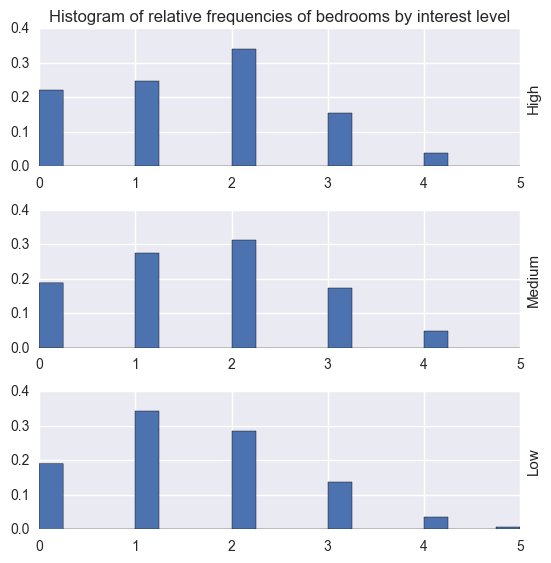

In [13]:
# Plot histograms of number of bedrooms by interest level, to see if there's a meaningful difference
plot_hist_by_interest('bedrooms', nbins=20, xmax=5)

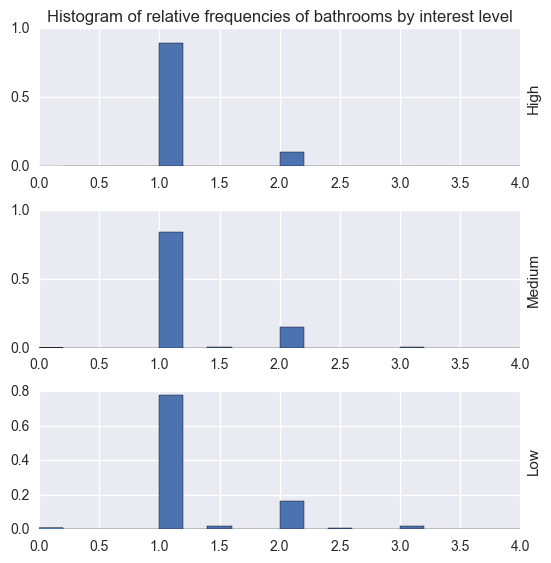

In [14]:
# Histograms of bathrooms...
plot_hist_by_interest('bathrooms', 0, 4, nbins=20)

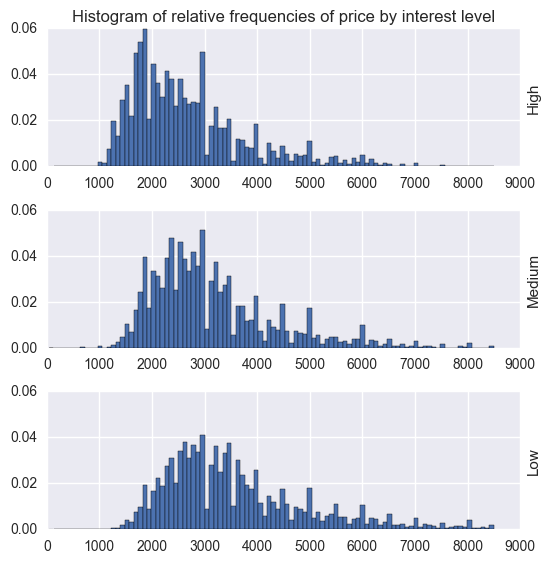

In [33]:
# Histograms of price...
plot_hist_by_interest('price', 0, 8500, nbins=100)

###### Looks like the lower-interest listings have a longer right tail on price

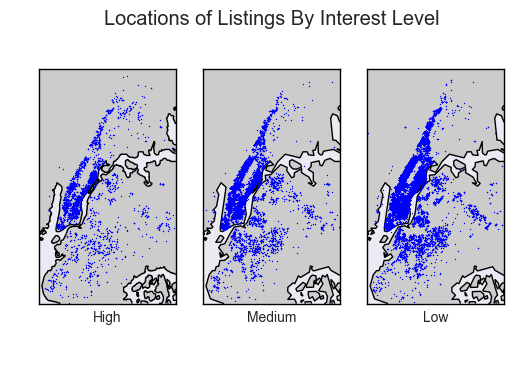

In [16]:
# Map locations of listings (lat/long) to look for indicators of particular interest levels

fig = plt.figure()
plt.axis('off')
plt.title('Locations of Listings By Interest Level', size='x-large')

ax1 = fig.add_subplot(131)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'f', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_high.longitude.values
lats = X_high.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=1)
ax1.set_xlabel('High', size='medium')


ax2 = fig.add_subplot(132)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_med.longitude.values
lats = X_med.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=1)
ax2.set_xlabel('Medium', size='medium')


ax3 = fig.add_subplot(133)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_low.longitude.values
lats = X_low.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=1)
ax3.set_xlabel('Low', size='medium')

plt.show()

# Feature Engineering & Exploration

### This section creates and explores the following features:
- 'n_features', the length of the list in the 'features' column
- Unique features listed in the 'features' column, and relative frequencies of most common by interest level
- price_per_bed, price / number of bedrooms
- price_per_bath, price / number of bathrooms
- bed_to_bath, ratio of number of bedrooms / number of bathrooms
- 'n_photos', the length of the list in the 'photos' column

### Number of Features Included in 'features' Column

In [17]:
X_train['n_features'] = X_train['features'].apply(lambda x : len(x))
X_low, y_low, X_med, y_med, X_high, y_high = separate_by_interest(X_train, y_train)

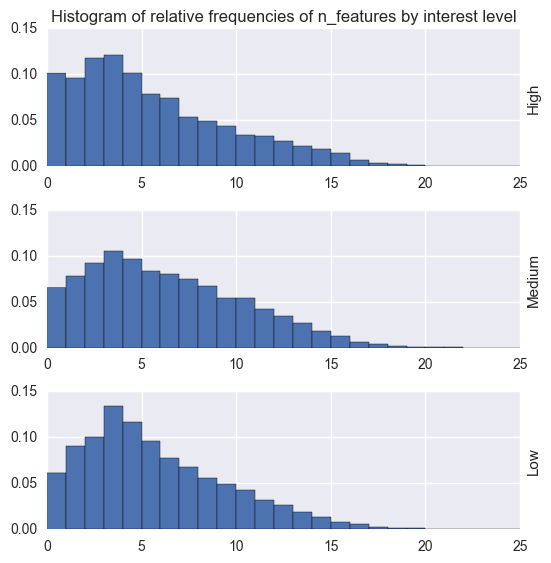

In [18]:
# Plot histogram of n_features by interest level to look for indicators of a particular interest level
plot_hist_by_interest('n_features', xmax=25, nbins=25)

### Examining Unique Features Included in 'features' Column

In [19]:
features_set = set().union(*X_train.features.values)

In [34]:
print 'Total number of unique features: {}'.format(len(features_set))

Total number of unique features: 1556


In [35]:
# Take a look at a few of them
list(features_set)[:25]

[u'Updated Kitchen and Bathroom',
 u'Gym Fitness Lounge Swimming Pool Sun Decks Exercise Studios Indoor Half-Basketball Court',
 u'Gas&Electric included',
 u'private-outdoor-space',
 u'Great Natural Light',
 u'Super On Site',
 u'Vaulted Ceilings',
 u'custom lighting',
 u'Diswasher',
 u'Brand Newm Outdoor Deck',
 u'STAINLESS STEEL',
 u'central air',
 u'Central Park 1/2 block away!',
 u'** HOLY DEAL BATMAN! * ENTIRE FLOOR! * MASSIVE 4BR MANSION * GOURMET KITCHEN * PETS OK **',
 u'** PRISTINE PREWAR GEM! * MASSIVE 3BR SUPER SHARE * GUT RENOVATED * CHEF;S KITCHEN * ELEV BLDG * PETS OK **',
 u'2nd Ave',
 u'Sun Drenched',
 u'Pets: Case by case',
 u'fireplace',
 u'must see',
 u'** PRISTINE PARK AVE S LOFT! * MASSIVE 3BR MANSION * WALLS OF WINDOWS * CHEF INSPIRED KITCHEN * ELEV BLDG **',
 u'Sun deck',
 u'Doorman',
 u'laundry in building',
 u'amazing detail']

### Relative Frequencies of Most Common Features Included in 'features' Column

In [36]:
# Create list of features, and create counters for how often each occurs across each interest level
feat_ctr = Counter(itertools.chain.from_iterable(X_train.features.values))
high_int_feat_ctr = Counter(itertools.chain.from_iterable(X_high.features.values))   
med_int_feat_ctr = Counter(itertools.chain.from_iterable(X_med.features.values))
low_int_feat_ctr = Counter(itertools.chain.from_iterable(X_low.features.values))

In [23]:
# Create list of most common features, and list of frequences for each interest level
most_common_features = map(lambda x : x[0], feat_ctr.most_common(15))
high_int_freq = map(lambda x : float(high_int_feat_ctr[x])/sum(high_int_feat_ctr.values()), most_common_features)
med_int_freq = map(lambda x : float(med_int_feat_ctr[x])/sum(med_int_feat_ctr.values()), most_common_features)
low_int_freq = map(lambda x : float(low_int_feat_ctr[x])/sum(low_int_feat_ctr.values()), most_common_features)

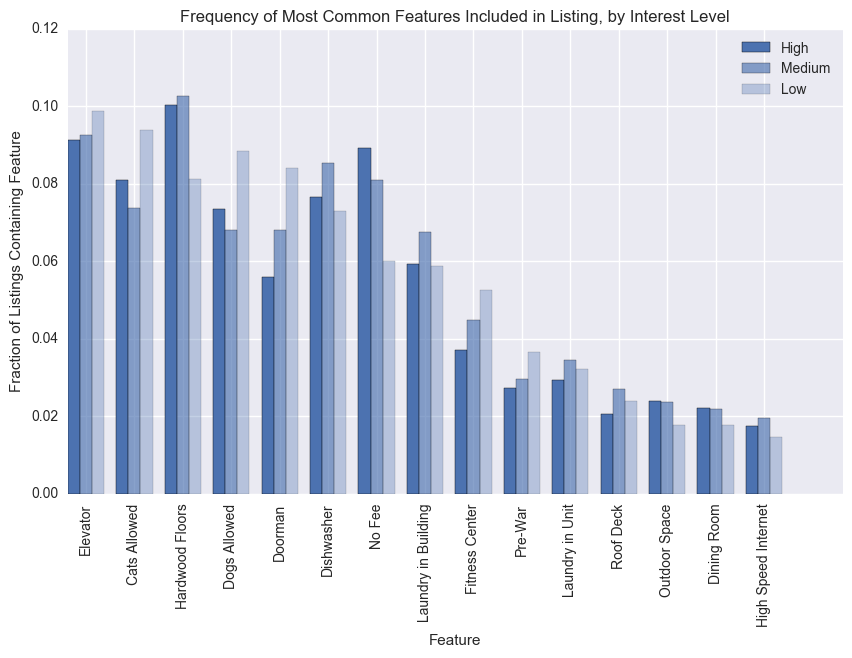

In [38]:
# Plot frequencies of most common features, by interest level
ind = np.arange(15)
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Frequency of Most Common Features Included in Listing, by Interest Level')
high = ax.bar(ind, high_int_freq, width, label='High')
med = ax.bar(ind+width, med_int_freq, width, alpha=0.66, label='Medium')
low = ax.bar(ind+2*width, low_int_freq, width, alpha=0.33, label='Low')
ax.set_ylabel('Fraction of Listings Containing Feature')
ax.set_xticks(ind+1.5*width)
ax.set_xticklabels(most_common_features, rotation=90)
ax.set_xlabel('Feature')
ax.legend()
plt.show();

## Takeaways:
- Sheer number of features included in listing present in listing doesn't tell us much
    - (e.g. large number of features is not indicator of high interest listing)
- Large number of distinct features included in listing, but after the first 15 most common, less than 1% of listings have any given feature
- Gut says there may be value in doing NLP on 'features' column
    - All-caps, no-caps, excessive punctuation, etc. could be sign of lower interest level
- No clear indicator for a particular interest level among 15 most common features included in listing


### Bedroom / Bathroom-Related Features

Adding the following features:
- price_per_bed (price / bedrooms)
- price-per-bath (price / bathrooms)
- bed-to-bath (bedrooms / bathrooms)

In [25]:
X_train['price_per_bed'] = X_train.price/X_train.bedrooms
X_train['price_per_bath'] = X_train.price/X_train.bathrooms
X_train['bed_to_bath'] = X_train.bedrooms/X_train.bathrooms
X_low, y_low, X_med, y_med, X_high, y_high = separate_by_interest(X_train, y_train)

In [26]:
print 'Number of high interest listings with 0 bedrooms: {}'.format(sum(X_high.bedrooms==0))
print 'Number of medium interest listings with 0 bedrooms: {}'.format(sum(X_med.bedrooms==0))
print 'Number of low interest listings with 0 bedrooms: {}'.format(sum(X_low.bedrooms==0)), '\n'

print 'Number of high interest listings with 0 bathrooms: {}'.format(sum(X_high.bathrooms==0))
print 'Number of medium interest listings with 0 bathrooms: {}'.format(sum(X_med.bathrooms==0))
print 'Number of low interest listings with 0 bathrooms: {}'.format(sum(X_low.bathrooms==0))

Number and fraction of high interest listings with 0 bedrooms: 847
Number and fraction of medium interest listings with 0 bedrooms: 2110
Number and fraction of low interest listings with 0 bedrooms: 6518 

Number and fraction of high interest listings with 0 bathrooms: 1
Number and fraction of medium interest listings with 0 bathrooms: 6
Number and fraction of low interest listings with 0 bathrooms: 306


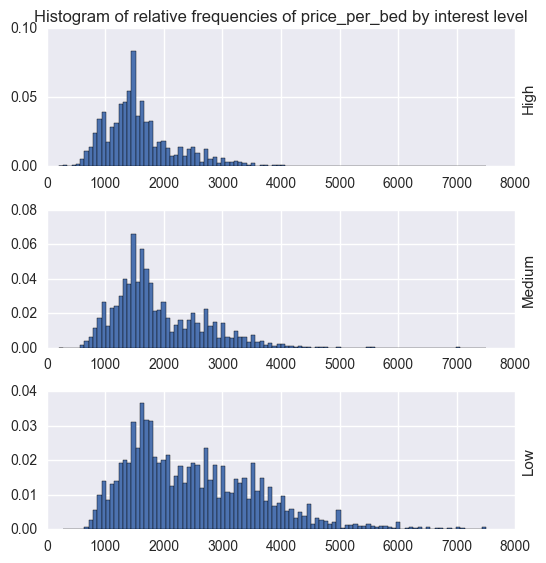

In [27]:
plot_hist_by_interest('price_per_bed', 0, 7500, nbins=100)

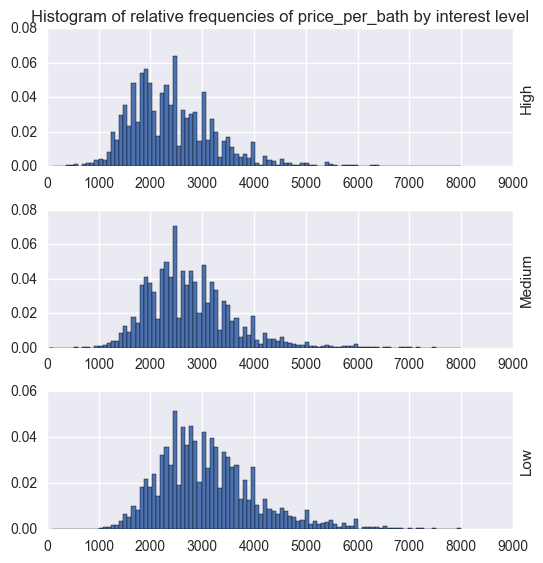

In [28]:
plot_hist_by_interest('price_per_bath', 0, 8000, nbins=100)

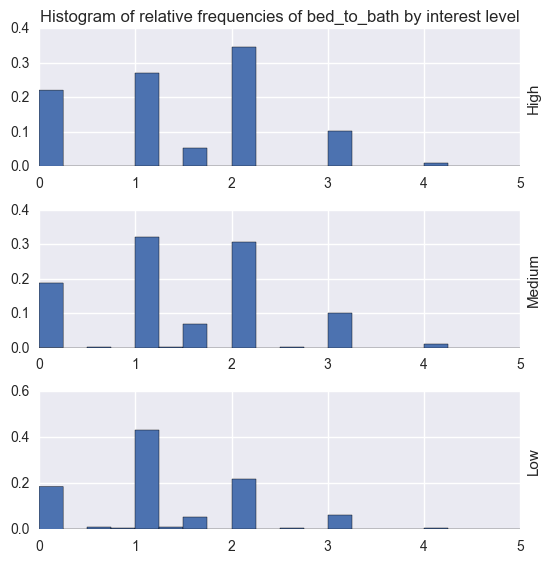

In [29]:
plot_hist_by_interest('bed_to_bath', 0, 5, nbins=20)

### Takeaways:

- 0 bathrooms is a clear indicator of a lower-interest listing
    - only 1/314 is high interest
    - only 7/314 are not low interest
- Lower interest listings have a much longer right tail in price_per_bedroom
- Lower interest listings have a slightly longer right tail in price_per_bathroom
- Bed_to_bath ratio distribution is relatively consistent across interest levels

### Number of Photos Included in Listing
Adding the following feature:
- 'n_photos', length of list in 'photos' column

In [39]:
X_train['n_photos'] = X_train['photos'].apply(lambda x : len(x))
X_low, y_low, X_med, y_med, X_high, y_high = separate_by_interest(X_train, y_train)

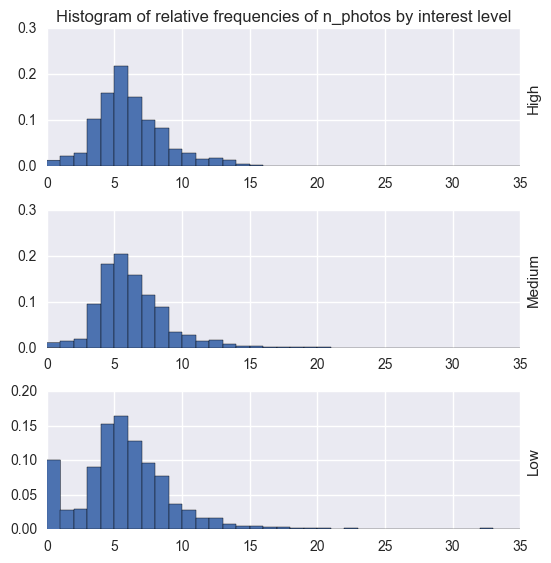

In [42]:
plot_hist_by_interest('n_photos', xmax=35, nbins=35)

In [50]:
print 'Frequency of high interest listings with 0 photos: {}'.format(sum(X_high.n_photos==0)*1./len(X_high))
print 'Frequency of medium interest listings with 0 photos: {}'.format(sum(X_med.n_photos==0)*1./len(X_med))
print 'Frequency of low interest listings with 0 photos: {}'.format(sum(X_low.n_photos==0)*1./len(X_low)), '\n'

print 'Frequency of high interest listings with 1-2 photos: {}'.format(sum(np.logical_and(0<X_high.n_photos, 
                                                                                       X_high.n_photos<3))*1./len(X_high))
print 'Frequency of medium interest listings with 1-2 photos: {}'.format(sum(np.logical_and(0<X_med.n_photos,
                                                                                         X_med.n_photos<3))*1./len(X_med))
print 'Frequency of low interest listings with 1-2 photos: {}'.format(sum(np.logical_and(0<X_low.n_photos,
                                                                                      X_low.n_photos<3))*1./len(X_low)), '\n'

print 'Frequency of high interest listings with >16 photos: {}'.format(sum(X_high.n_photos>16)*1./len(X_high))
print 'Frequency of medium interest listings with >16 photos: {}'.format(sum(X_med.n_photos>16)*1./len(X_med))
print 'Frequency of low interest listings with >16 photos: {}'.format(sum(X_low.n_photos>16)*1./len(X_low))


Frequency of high interest listings with 0 photos: 0.0130242250586
Frequency of medium interest listings with 0 photos: 0.0109537803901
Frequency of low interest listings with 0 photos: 0.100396686501 

Frequency of high interest listings with 1-2 photos: 0.0494920552227
Frequency of medium interest listings with 1-2 photos: 0.0327722860451
Frequency of low interest listings with 1-2 photos: 0.0569945163925 

Frequency of high interest listings with >16 photos: 0.00364678301641
Frequency of medium interest listings with >16 photos: 0.00587763825808
Frequency of low interest listings with >16 photos: 0.017180025668


## Takeaways:
- Not listing any photos is a decent indicator for lower interest
- Listing more than 16 photos is somewhat of an indicator for lower interest
- Anything between 0 and 15 photos is not particularly indicative of any interest level